## Project-2

**How particles scatter and absorb EM wave energy?**
* The answer to this question fundamentally guides remote sensing of aerosol, cloud, and precipitation.

**Through the exercise in this project, we should know:**
1. How to compute absorption and scattering coefficients of water drops and ice spheres at VIS, IR, and microwave spectra,
2. How to compute phase function and asymmetry parameter of these particles,
3. How the refractive index varies with wavelength and the phase of water (liquid or ice) and the implication of the differences in the remote sensing.

## Q1, Q2, and Q3

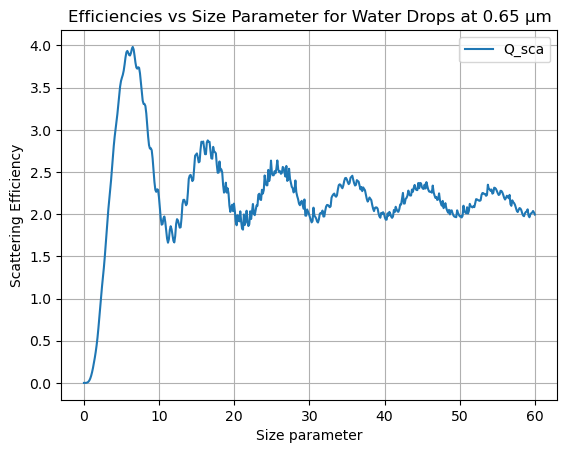

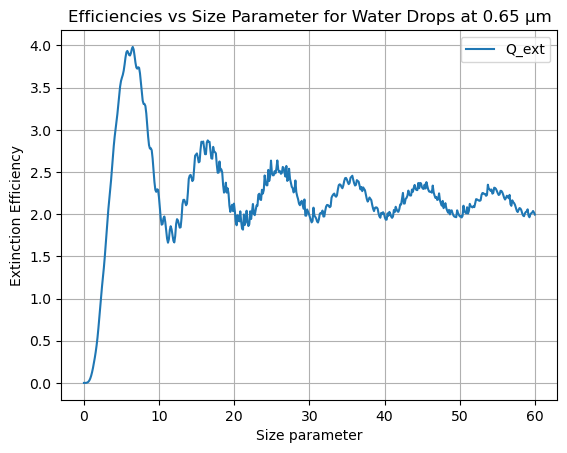

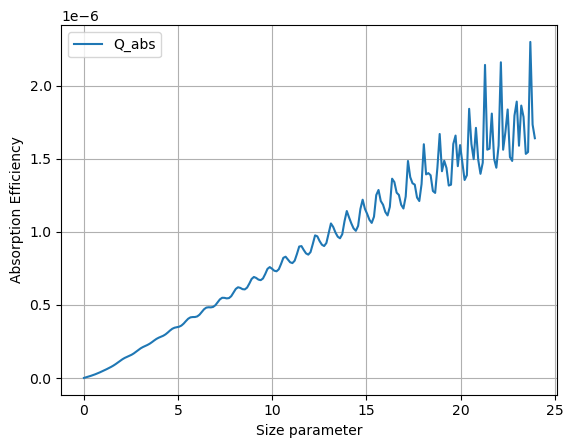

In [6]:
# Libraries
import numpy as np
import math
import cmath
from riwaterice import mwater  # Assuming mwater is defined for refractive index calculations

# Constants and values
wavelength = 0.65  # Visible light in µm
chi_vals = np.linspace(0.01, 60, 500)  # Size parameter range
Q_ext_vals, Q_sca_vals, Q_abs_vals = [], [], []

# Set refractive index for water at visible wavelength
m = mwater(wavelength, 25)  # Water refractive index at 25°C

# Calculate radius values based on chi_vals
radius_values = (chi_vals * wavelength) / (2 * np.pi)  # in µm

# Main loop over each size parameter
for count, x in enumerate(chi_vals):

    mx = m * x
    
    max_n = 1 + round(x + 4.05 * x**(1/3) + 2)  # Wiscombe's formula for N
    max_n = max(10, max_n)
    
    an, bn = np.zeros(max_n, dtype=complex), np.zeros(max_n, dtype=complex)
    
    # Initial values for W_n, W_(n-1), and A_(n-1) based on recurrence relations
    W_n_2 = complex(np.cos(x), -np.sin(x))
    W_n_1 = complex(np.sin(x), np.cos(x))
    A_n_1 = cmath.cos(mx) / cmath.sin(mx)

    # Initialize efficiency values
    Q_ext = 0
    Q_sca = 0

    # Loop for Mie coefficients
    for n in range(1, max_n + 1):
        # Calculate W_n and An based on recurrence relations
        W_n = ((2 * n - 1) / x) * W_n_1 - W_n_2
        An = -(n / mx) + (1 / ((n / mx) - A_n_1))

        # Calculate Mie coefficients an and bn
        an[n - 1] = ((An / m) + (n / x)) * W_n.real - W_n_1.real
        an[n - 1] /= ((An / m) + (n / x)) * W_n - W_n_1

        bn[n - 1] = ((m * An) + (n / x)) * W_n.real - W_n_1.real
        bn[n - 1] /= ((m * An) + (n / x)) * W_n - W_n_1

        # Update Q_ext and Q_sca based on Mie coefficients
        Q_ext += (2 * n + 1) * (an[n - 1].real + bn[n - 1].real)
        Q_sca += (2 * n + 1) * (np.abs(an[n - 1])**2 + np.abs(bn[n - 1])**2)

        # Update previous W_n and A_n for the next iteration
        W_n_2 = W_n_1
        W_n_1 = W_n
        A_n_1 = An
            
    # Finalize efficiency calculations
    Q_ext_vals.append((2 / x**2) * Q_ext)
    Q_sca_vals.append((2 / x**2) * Q_sca)
    Q_abs_vals.append((2 / x**2) * (Q_ext - Q_sca))

# Plot results
import matplotlib.pyplot as plt
plt.figure()
plt.plot(chi_vals, Q_sca_vals, label='Q_sca')
plt.xlabel('Size parameter')
plt.ylabel('Scattering Efficiency')
plt.title('Efficiencies vs Size Parameter for Water Drops at 0.65 µm')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(chi_vals, Q_ext_vals, label='Q_ext')
plt.xlabel('Size parameter')
plt.ylabel('Extinction Efficiency')
plt.title('Efficiencies vs Size Parameter for Water Drops at 0.65 µm')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(chi_vals[:200], Q_abs_vals[:200], label='Q_abs')
plt.xlabel('Size parameter')
plt.ylabel('Absorption Efficiency')
plt.title('')#Efficiencies vs Size Parameter for Water Drops at 0.65 µm')
plt.legend()
plt.grid()
plt.show()

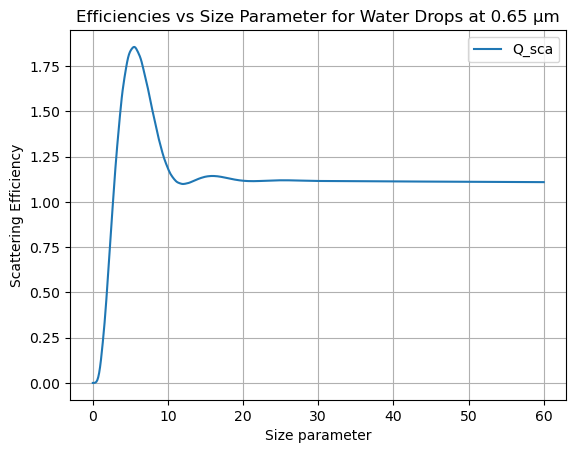

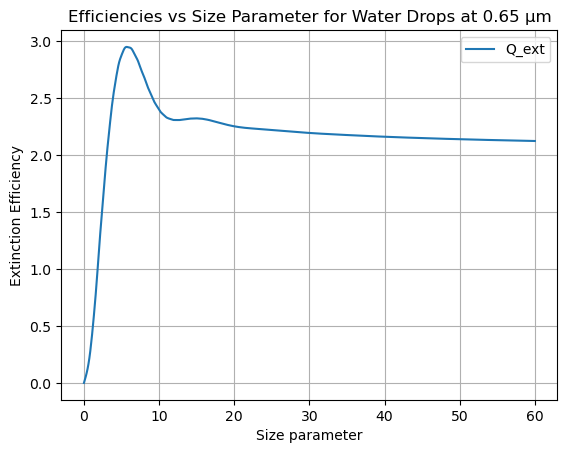

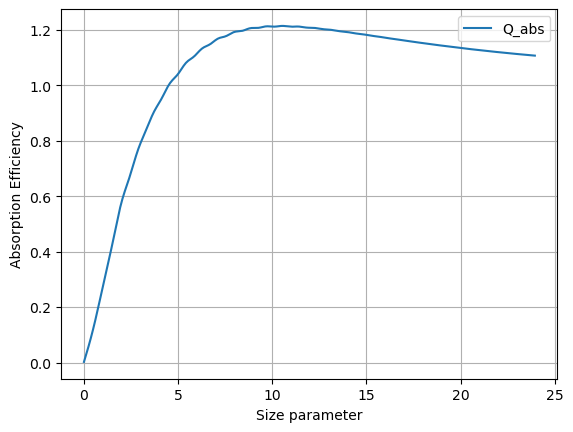

In [7]:
# Libraries
import numpy as np
import math
import cmath
from riwaterice_modified import mwater  # Assuming mwater is defined for refractive index calculations

# Constants and values
wavelength = 0.65  # Visible light in µm
chi_vals = np.linspace(0.01, 60, 500)  # Size parameter range
Q_ext_vals, Q_sca_vals, Q_abs_vals = [], [], []

# Set refractive index for water at visible wavelength
#m = complex(1.33, 0)
m = mwater(wavelength, 25)  # Water refractive index at 25°C

# Calculate radius values based on chi_vals
radius_values = (chi_vals * wavelength) / (2 * np.pi)  # in µm

# Main loop over each size parameter
for count, x in enumerate(chi_vals):
    max_n = 1 + round(x + 4.05 * x**(1/3) + 2)  # Wiscombe's formula for N
    max_n = max(10, max_n)
    
    an, bn = np.zeros(max_n, dtype=complex), np.zeros(max_n, dtype=complex)
    
    # Initial values for W_n, W_(n-1), and A_(n-1) based on recurrence relations
    W_n_2 = complex(np.cos(x), -np.sin(x))
    W_n_1 = complex(np.sin(x), np.cos(x))
    mx = m * x
    A_n_1 = cmath.cos(mx) / cmath.sin(mx)

    # Initialize efficiency values
    Q_ext = 0
    Q_sca = 0

    # Loop for Mie coefficients
    for n in range(1, max_n + 1):
        # Calculate W_n and An based on recurrence relations
        W_n = ((2 * n - 1) / x) * W_n_1 - W_n_2
        An = -(n / mx) + (1 / ((n / mx) - A_n_1))

        # Calculate Mie coefficients an and bn
        an[n - 1] = ((An / m) + (n / x)) * W_n.real - W_n_1.real
        an[n - 1] /= ((An / m) + (n / x)) * W_n - W_n_1

        bn[n - 1] = ((m * An) + (n / x)) * W_n.real - W_n_1.real
        bn[n - 1] /= ((m * An) + (n / x)) * W_n - W_n_1

        # Update Q_ext and Q_sca based on Mie coefficients
        Q_ext += (2 * n + 1) * (an[n - 1].real + bn[n - 1].real)
        Q_sca += (2 * n + 1) * (np.abs(an[n - 1])**2 + np.abs(bn[n - 1])**2)

        # Update previous W_n and A_n for the next iteration
        W_n_2 = W_n_1
        W_n_1 = W_n
        A_n_1 = An
            
    # Finalize efficiency calculations
    Q_ext_vals.append((2 / x**2) * Q_ext)
    Q_sca_vals.append((2 / x**2) * Q_sca)
    Q_abs_vals.append((2 / x**2) * (Q_ext - Q_sca))

# Plot results
import matplotlib.pyplot as plt
plt.figure()
plt.plot(chi_vals, Q_sca_vals, label='Q_sca')
plt.xlabel('Size parameter')
plt.ylabel('Scattering Efficiency')
plt.title('Efficiencies vs Size Parameter for Water Drops at 0.65 µm')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(chi_vals, Q_ext_vals, label='Q_ext')
plt.xlabel('Size parameter')
plt.ylabel('Extinction Efficiency')
plt.title('Efficiencies vs Size Parameter for Water Drops at 0.65 µm')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(chi_vals[:200], Q_abs_vals[:200], label='Q_abs')
plt.xlabel('Size parameter')
plt.ylabel('Absorption Efficiency')
plt.title('')#Efficiencies vs Size Parameter for Water Drops at 0.65 µm')
plt.legend()
plt.grid()
plt.show()

In [8]:
# Libraries
import numpy as np
import math
import cmath
from riwaterice import mwater_mw, mice_mw

# Constants and values
c = 2.998e8  # Speed of light in m/s
wavelength = c / 37e9 *1e6 #in µm
radius_value = 20 #micrometer

# Set refractive index for water and ice
m = mwater_mw(wavelength, 0)  # Water refractive index at 0°C

#----------------------------------------------------
# chi -- size parameter
#----------------------------------------------------
def chi(rad, lmbda):
    return ( 2 * np.pi * rad ) / lmbda

x = chi(radius_value, wavelength)


Q_ext_vals, Q_sca_vals, Q_abs_vals = [], [], []
# Main loop over each size parameter

max_n = 1 + round(x + 4.05 * x**(1/3) + 2)  # Wiscombe's formula for N
max_n = max(10, max_n)

an, bn = np.zeros(max_n, dtype=complex), np.zeros(max_n, dtype=complex)

# Initial values for W_n, W_(n-1), and A_(n-1) based on recurrence relations
W_n_2 = complex(np.cos(x), -np.sin(x))
W_n_1 = complex(np.sin(x), np.cos(x))
mx = m * x
A_n_1 = cmath.cos(mx) / cmath.sin(mx)

# Initialize efficiency values
Q_ext = 0
Q_sca = 0

# Loop for Mie coefficients
for n in range(1, max_n + 1):
    # Calculate W_n and An based on recurrence relations
    W_n = ((2 * n - 1) / x) * W_n_1 - W_n_2
    An = -(n / mx) + (1 / ((n / mx) - A_n_1))

    # Calculate Mie coefficients an and bn
    an[n - 1] = ((An / m) + (n / x)) * W_n.real - W_n_1.real
    an[n - 1] /= ((An / m) + (n / x)) * W_n - W_n_1

    bn[n - 1] = ((m * An) + (n / x)) * W_n.real - W_n_1.real
    bn[n - 1] /= ((m * An) + (n / x)) * W_n - W_n_1

    # Update Q_ext and Q_sca based on Mie coefficients
    Q_ext += (2 * n + 1) * (an[n - 1].real + bn[n - 1].real)
    Q_sca += (2 * n + 1) * (np.abs(an[n - 1])**2 + np.abs(bn[n - 1])**2)

    # Update previous W_n and A_n for the next iteration
    W_n_2 = W_n_1
    W_n_1 = W_n
    A_n_1 = An
        
# Finalize efficiency calculations
Q_ext_vals.append((2 / x**2) * Q_ext)
Q_sca_vals.append((2 / x**2) * Q_sca)
Q_abs_vals.append((2 / x**2) * (Q_ext - Q_sca))

In [9]:
Qsca_water = Q_sca_vals
Qabs_water = Q_abs_vals

del Q_ext_vals
del Q_sca_vals
del Q_abs_vals

In [10]:
# Libraries
import numpy as np
import math
import cmath
from riwaterice import mwater_mw, mice_mw

# Constants and values
c = 2.998e8  # Speed of light in m/s
wavelength = c / 37e9 *1e6 #in µm
radius_value = 20 #micrometer

# Set refractive index for water and ice
m = mice_mw(wavelength, 0)  # Water refractive index at 0°C

#----------------------------------------------------
# chi -- size parameter
#----------------------------------------------------
def chi(rad, lmbda):
    return ( 2 * np.pi * rad ) / lmbda

x = chi(radius_value, wavelength)


Q_ext_vals, Q_sca_vals, Q_abs_vals = [], [], []
# Main loop over each size parameter

max_n = 1 + round(x + 4.05 * x**(1/3) + 2)  # Wiscombe's formula for N
max_n = max(10, max_n)

an, bn = np.zeros(max_n, dtype=complex), np.zeros(max_n, dtype=complex)

# Initial values for W_n, W_(n-1), and A_(n-1) based on recurrence relations
W_n_2 = complex(np.cos(x), -np.sin(x))
W_n_1 = complex(np.sin(x), np.cos(x))
mx = m * x
A_n_1 = cmath.cos(mx) / cmath.sin(mx)

# Initialize efficiency values
Q_ext = 0
Q_sca = 0

# Loop for Mie coefficients
for n in range(1, max_n + 1):
    # Calculate W_n and An based on recurrence relations
    W_n = ((2 * n - 1) / x) * W_n_1 - W_n_2
    An = -(n / mx) + (1 / ((n / mx) - A_n_1))

    # Calculate Mie coefficients an and bn
    an[n - 1] = ((An / m) + (n / x)) * W_n.real - W_n_1.real
    an[n - 1] /= ((An / m) + (n / x)) * W_n - W_n_1

    bn[n - 1] = ((m * An) + (n / x)) * W_n.real - W_n_1.real
    bn[n - 1] /= ((m * An) + (n / x)) * W_n - W_n_1

    # Update Q_ext and Q_sca based on Mie coefficients
    Q_ext += (2 * n + 1) * (an[n - 1].real + bn[n - 1].real)
    Q_sca += (2 * n + 1) * (np.abs(an[n - 1])**2 + np.abs(bn[n - 1])**2)

    # Update previous W_n and A_n for the next iteration
    W_n_2 = W_n_1
    W_n_1 = W_n
    A_n_1 = An
        
# Finalize efficiency calculations
Q_ext_vals.append((2 / x**2) * Q_ext)
Q_sca_vals.append((2 / x**2) * Q_sca)
Q_abs_vals.append((2 / x**2) * (Q_ext - Q_sca))

In [11]:
Qsca_ice = Q_sca_vals
Qabs_ice = Q_abs_vals

del Q_ext_vals
del Q_sca_vals
del Q_abs_vals

In [12]:
print('Qsca_water :', Qsca_water)
print('Qsca_ice :', Qsca_ice)
print('-----------------------------')
print('Qabs_water :', Qabs_water)
print('Qsca_ice :', Qabs_ice)

Qsca_water : [1.348307267331774e-07]
Qsca_ice : [2.7449729612194337e-08]
-----------------------------
Qabs_water : [0.0066920651128288015]
Qsca_ice : [2.3565751961197505e-05]


In [13]:
# Find the exponent to normalize all values to (e.g., -07)
target_exponent = -7
target_exponent2 = -7

# Define a function to format each value to the same exponent
def format_to_exponent(value, exponent):
    # Adjust the value to the target exponent
    adjusted_value = value * (10 ** (-exponent))
    return f"{adjusted_value:.10f}e{exponent:+03d}"

# Print the values with the same exponent
print('Qsca_water :', format_to_exponent(Qsca_water[0], target_exponent))
print('Qsca_ice   :', format_to_exponent(Qsca_ice[0], target_exponent))
print('--------------------------------')
print('Qabs_water :', format_to_exponent(Qabs_water[0], target_exponent2))
print('Qabs_ice   :', format_to_exponent(Qabs_ice[0], target_exponent2))


Qsca_water : 1.3483072673e-07
Qsca_ice   : 0.2744972961e-07
--------------------------------
Qabs_water : 66920.6511282880e-07
Qabs_ice   : 235.6575196120e-07


## Q4.1-2

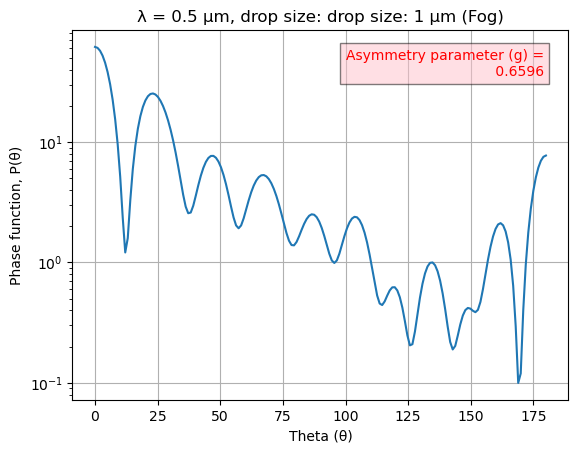

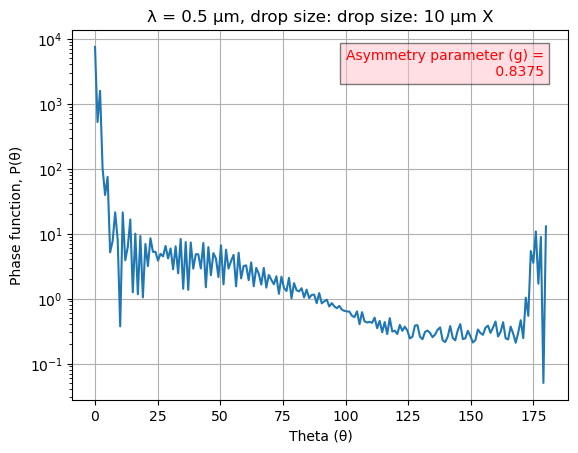

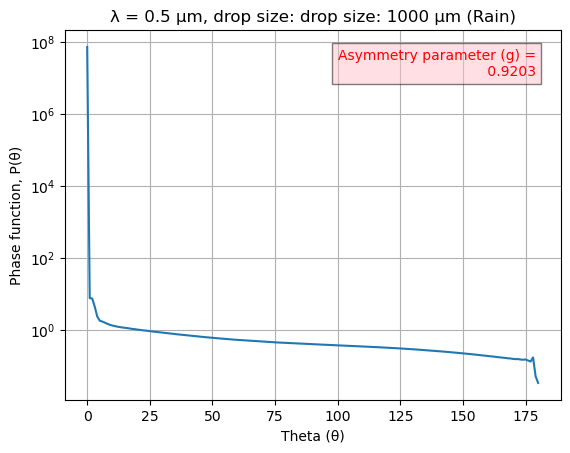

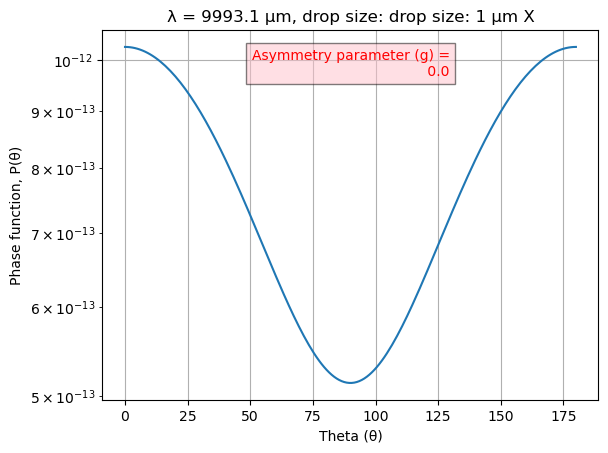

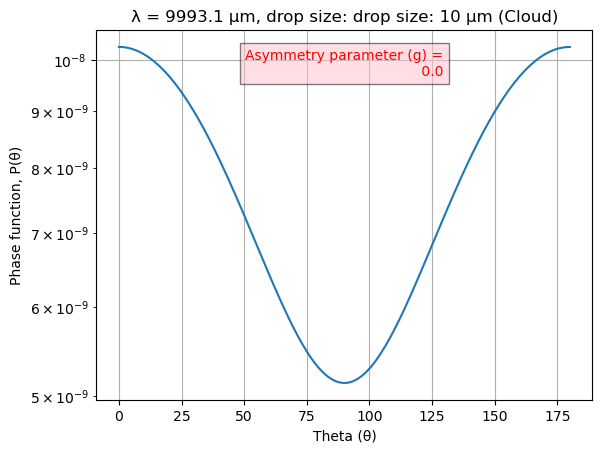

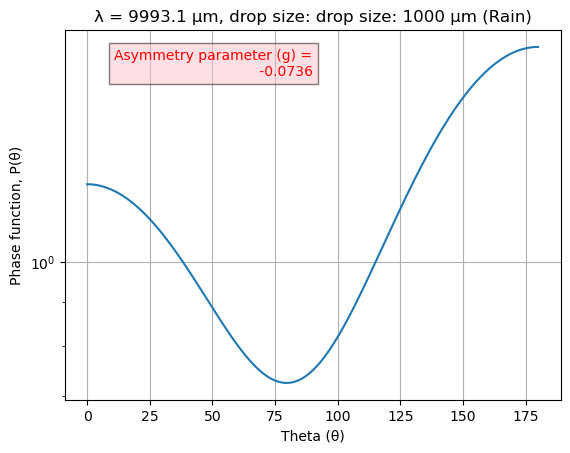

In [40]:
# Libraries
import numpy as np
import math
import cmath
from riwaterice import mwater, mwater_mw  # Assuming mwater is defined for refractive index calculations
import matplotlib.pyplot as plt

# Constants and values
theta_vals = np.linspace(0,180,180)  # θ (theta) sign
c = 2.99792458e8  # Speed of light in m/s
wavelength = [0.5,c/30e9*1e6] #in µm
radius_value = [1,10,1000] #micrometer
title = ['(Fog)','X','(Rain)','X','(Cloud)','(Rain)']

say=0
for wavelength in wavelength:
    k = 2 * np.pi / wavelength
    
    for rad in radius_value:
        x = ( 2 * np.pi * rad ) / wavelength
    
        # Set refractive index for water and ice
        m = mwater_mw(wavelength, 10)  # Water refractive index at 10°C

        
        mx = m * x
        
        S_1_theta_vals, S_2_theta_vals = [], []
    
        # Main loop over each size parameter
        for count, theta in enumerate(theta_vals):
        
            max_n = 1 + round(x + 4.05 * x**(1/3) + 2)  # Wiscombe's formula for N
            max_n = max(10, max_n)
        
            mu = np.cos(np.radians(theta))
            
            an, bn = np.zeros(max_n, dtype=complex), np.zeros(max_n, dtype=complex)
            pin, taun = np.zeros(max_n), np.zeros(max_n)
            
            # Initial values for W_n, W_(n-1), and A_(n-1) based on recurrence relations
            W_n_2 = complex(np.cos(x), -np.sin(x))
            W_n_1 = complex(np.sin(x), np.cos(x))
            A_n_1 = cmath.cos(mx) / cmath.sin(mx)
        
            pin_2 = 0
            pin_1 = 1 
        
            # Initialize S1-2 values
            S_1_theta = 0
            S_2_theta = 0
        
            # Loop for Mie coefficients
            for n in range(1, max_n):
                # Calculate W_n and An based on recurrence relations
                W_n = ((2 * n - 1) / x) * W_n_1 - W_n_2
                An = -(n / mx) + (1 / ((n / mx) - A_n_1))
        
                # Calculate Mie coefficients an and bn
                an[n - 1] = ((An / m) + (n / x)) * W_n.real - W_n_1.real
                an[n - 1] /= ((An / m) + (n / x)) * W_n - W_n_1
        
                bn[n - 1] = ((m * An) + (n / x)) * W_n.real - W_n_1.real
                bn[n - 1] /= ((m * An) + (n / x)) * W_n - W_n_1
        
                if n==1:
                    pin[n - 1] = 0
                    pin[n] = 1
                    taun[n - 1] = n * mu * pin[n] - (n+1) * pin[n-1]
                else:
                    pin[n - 1] = ((2*n-1)/(n-1)) * mu * pin_1 - (n/(n-1)) * pin_2
                    taun[n] = n * mu * pin[n-1] - (n+1) * pin_1
              
                           
                # Update S_1_theta and S_2_theta based on Mie coefficients
                S_1_theta += ( (2 * n + 1) / (n*(n+1)) ) * ( (an[n - 1]*pin[n])+(bn[n-1]*taun[n-1]) ) 
                S_2_theta += ( (2 * n + 1) / (n*(n+1)) ) * ( (an[n - 1]*taun[n-1])+(bn[n-1]*pin[n]) ) 
        
                # Update previous W_n and A_n for the next iteration
                W_n_2 = W_n_1
                W_n_1 = W_n
                A_n_1 = An
                pin_2 = pin_1
                pin_1 = pin[n-1]
                
            # Finalize efficiency calculations
            S_1_theta_vals.append(S_1_theta)
            S_2_theta_vals.append(S_2_theta)
            


        Q_sca = 0
        for n in range(1, max_n):
            Q_sca += (2 * n + 1) * (np.abs(an[n - 1])**2 + np.abs(bn[n - 1])**2)
        Q_sca = (2 / x**2) * Q_sca
        
        term_1 = 0
        term_2 = 0
        for n in range(1, max_n+1):
            if n != max_n:
                term_1+= ((n*(n+2))/(n+1)) * (an[n - 1]*an[n].conjugate() + bn[n - 1]*bn[n].conjugate()).real
                term_2+= ((2*n+1)/(n*(n+1))) * (an[n - 1] * bn[n - 1].conjugate()).real
            else:
                pass
    
        # Calculate asymmetry parameter g
        g = (4 / (x**2 * Q_sca)) * (term_1 + term_2)
        
        #print(g)
        #say+=1

        S_theta = []
        PhaseF = []
        
        for count, theta in enumerate(theta_vals):
            S_theta = 0.5 * ((abs(S_1_theta_vals[count]))**2 + (abs(S_2_theta_vals[count]))**2)
            PhaseF.append((4*np.pi*S_theta)/ (k**2 * (Q_sca_vals[0] * np.pi * rad**2)))
        
        #----------------------------
        # plotting
        #----------------------------
        
        plt.figure()
        plt.plot(theta_vals, PhaseF)
        plt.xlabel('Theta (θ)')
        plt.ylabel('Phase function, P(θ)')
        plt.yscale('log')
        plt.title('λ = '+str(round(wavelength,1))+' μm, drop size: drop size: '+str(rad)+' μm '+title[say])
        say+=1

        if say > 3 and say != 6: 
            horal = 0.7
        elif say == 6:
            horal = 0.5
        else: 
            horal = 0.95
            
        plt.text(
            horal, 0.95, 'Asymmetry parameter (g) =\n '+str(round(g,4)),
            transform=plt.gca().transAxes,  # Use axes coordinates (0, 0 is bottom-left, 1, 1 is top-right)
            fontsize=10, color='red', verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='pink', alpha=0.5)
        )
        #plt.legend()
        plt.grid()
        plt.show()
        
        #----------------------------
        # plotting (polar plot)
        #----------------------------
        '''
        # updated function with symlog
        def scatter_logpolar_mpl(ax, theta, r):
            #ax.scatter(theta, r)
            #ax.set_rlim(0)
            ax.set_rscale('symlog')
            #ax.set_title('log-polar matplotlib')
            
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111, polar=True)

        ax.set_facecolor('lightgrey')
        ax.set_theta_zero_location("N")
        ax.set_theta_direction(-1)
        
        big_angle = 360/12
        middles=np.arange(0 ,360, big_angle)*np.pi/180
        ax.set_xticks(middles)
        
        ax.set_rlabel_position(362)
        ax.tick_params(axis='both',color='black')
        plt.grid(None,axis='x',color='black')
        plt.grid(axis='y',color='black', linestyle=':', linewidth=1) 

        plt.plot(theta_vals/180*np.pi, PhaseF, 'r')

        #use this if you want to arrange individual intervals
        #scatter_logpolar_mpl(ax, theta_vals/180*np.pi, PhaseF) 

        #use this if you want same intervals for all
        #ax.set(ylim=(1,1e4))
        #ax.legend(fontsize=8,loc=3)

        
        plt.title('drop size: '+str(rad)+' μm '+title[say])
        say+=1

        #plt.subplot(122)
        #plt.plot(theta_vals, PhaseF)
        #plt.grid()

        # info box
        infobox = ''
        infobox += 'λ: '+ str(round(wavelength,1))+' μm\n'
        infobox += 'm: '+ str(f"({m.real:.0f} {m.imag:+.0f}j)")+'\n' #'n: 2 + i 0'
        infobox += 'g: '+ str(g) 
        props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5) 
        ax.text(-0.15,1,infobox, fontsize=6,bbox=props,verticalalignment='top',transform=ax.transAxes)
        plt.show()
        
        '''
        

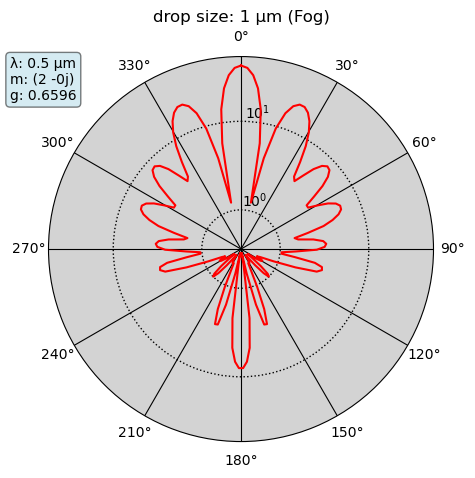

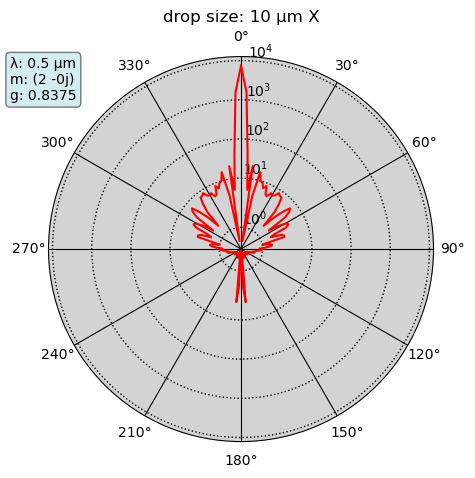

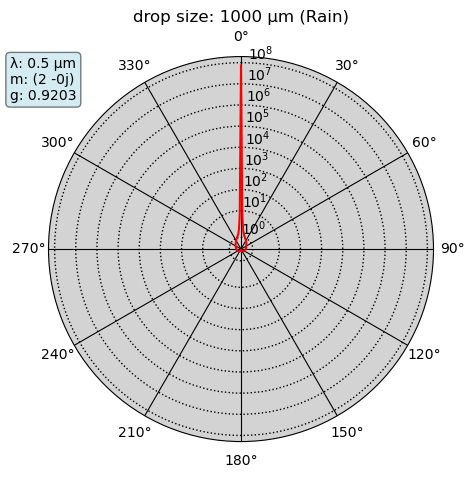

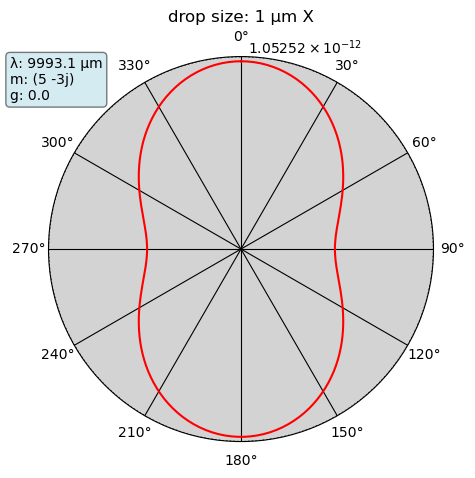

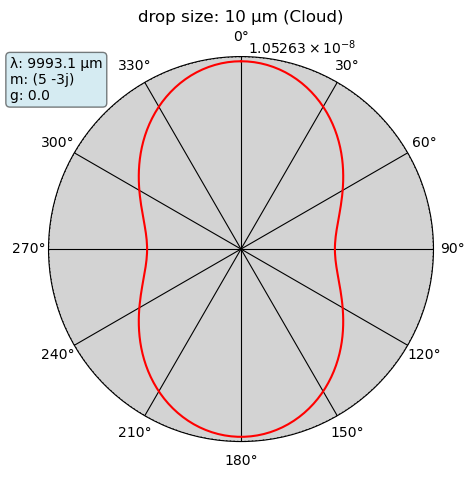

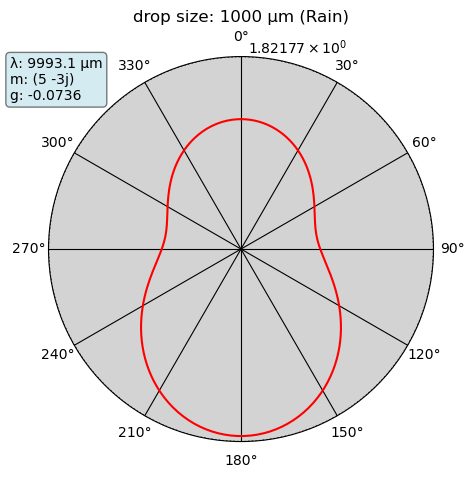

In [39]:
# Libraries
import numpy as np
import math
import cmath
from riwaterice import mwater, mwater_mw  # Assuming mwater is defined for refractive index calculations
import matplotlib.pyplot as plt

# Constants and values
theta_vals = np.linspace(0,360,180)  # θ (theta) sign
c = 2.99792458e8  # Speed of light in m/s
wavelength = [0.5,c/30e9*1e6] #in µm
radius_value = [1,10,1000] #micrometer
title = ['(Fog)','X','(Rain)','X','(Cloud)','(Rain)']

say=0
for wavelength in wavelength:
    k = 2 * np.pi / wavelength
    
    for rad in radius_value:
        x = ( 2 * np.pi * rad ) / wavelength
    
        # Set refractive index for water and ice
        m = mwater_mw(wavelength, 10)  # Water refractive index at 10°C

        
        mx = m * x
        
        S_1_theta_vals, S_2_theta_vals = [], []
    
        # Main loop over each size parameter
        for count, theta in enumerate(theta_vals):
        
            max_n = 1 + round(x + 4.05 * x**(1/3) + 2)  # Wiscombe's formula for N
            max_n = max(10, max_n)
        
            mu = np.cos(np.radians(theta))
            
            an, bn = np.zeros(max_n, dtype=complex), np.zeros(max_n, dtype=complex)
            pin, taun = np.zeros(max_n), np.zeros(max_n)
            
            # Initial values for W_n, W_(n-1), and A_(n-1) based on recurrence relations
            W_n_2 = complex(np.cos(x), -np.sin(x))
            W_n_1 = complex(np.sin(x), np.cos(x))
            A_n_1 = cmath.cos(mx) / cmath.sin(mx)
        
            pin_2 = 0
            pin_1 = 1 
        
            # Initialize S1-2 values
            S_1_theta = 0
            S_2_theta = 0
        
            # Loop for Mie coefficients
            for n in range(1, max_n):
                # Calculate W_n and An based on recurrence relations
                W_n = ((2 * n - 1) / x) * W_n_1 - W_n_2
                An = -(n / mx) + (1 / ((n / mx) - A_n_1))
        
                # Calculate Mie coefficients an and bn
                an[n - 1] = ((An / m) + (n / x)) * W_n.real - W_n_1.real
                an[n - 1] /= ((An / m) + (n / x)) * W_n - W_n_1
        
                bn[n - 1] = ((m * An) + (n / x)) * W_n.real - W_n_1.real
                bn[n - 1] /= ((m * An) + (n / x)) * W_n - W_n_1
        
                if n==1:
                    pin[n - 1] = 0
                    pin[n] = 1
                    taun[n - 1] = n * mu * pin[n] - (n+1) * pin[n-1]
                else:
                    pin[n - 1] = ((2*n-1)/(n-1)) * mu * pin_1 - (n/(n-1)) * pin_2
                    taun[n] = n * mu * pin[n-1] - (n+1) * pin_1
              
                           
                # Update S_1_theta and S_2_theta based on Mie coefficients
                S_1_theta += ( (2 * n + 1) / (n*(n+1)) ) * ( (an[n - 1]*pin[n])+(bn[n-1]*taun[n-1]) ) 
                S_2_theta += ( (2 * n + 1) / (n*(n+1)) ) * ( (an[n - 1]*taun[n-1])+(bn[n-1]*pin[n]) ) 
        
                # Update previous W_n and A_n for the next iteration
                W_n_2 = W_n_1
                W_n_1 = W_n
                A_n_1 = An
                pin_2 = pin_1
                pin_1 = pin[n-1]
                
            # Finalize efficiency calculations
            S_1_theta_vals.append(S_1_theta)
            S_2_theta_vals.append(S_2_theta)
            


        Q_sca = 0
        for n in range(1, max_n):
            Q_sca += (2 * n + 1) * (np.abs(an[n - 1])**2 + np.abs(bn[n - 1])**2)
        Q_sca = (2 / x**2) * Q_sca
        
        term_1 = 0
        term_2 = 0
        for n in range(1, max_n+1):
            if n != max_n:
                term_1+= ((n*(n+2))/(n+1)) * (an[n - 1]*an[n].conjugate() + bn[n - 1]*bn[n].conjugate()).real
                term_2+= ((2*n+1)/(n*(n+1))) * (an[n - 1] * bn[n - 1].conjugate()).real
            else:
                pass
    
        # Calculate asymmetry parameter g
        g = (4 / (x**2 * Q_sca)) * (term_1 + term_2)
        
        #print(g)
        #say+=1

        S_theta = []
        PhaseF = []
        
        for count, theta in enumerate(theta_vals):
            S_theta = 0.5 * ((abs(S_1_theta_vals[count]))**2 + (abs(S_2_theta_vals[count]))**2)
            PhaseF.append((4*np.pi*S_theta)/ (k**2 * (Q_sca_vals[0] * np.pi * rad**2)))
        
        #----------------------------
        # plotting
        #----------------------------
        '''
        plt.figure()
        plt.plot(theta_vals, PhaseF)
        plt.xlabel('Theta (θ)')
        plt.ylabel('Phase function, P(θ)')
        plt.yscale('log')
        plt.title('λ = '+str(round(wavelength,1))+' μm, drop size: drop size: '+str(rad)+' μm '+title[say])
        say+=1

        if say > 3 and say != 6: 
            horal = 0.7
        elif say == 6:
            horal = 0.5
        else: 
            horal = 0.95
            
        plt.text(
            horal, 0.95, 'Asymmetry parameter (g) =\n '+str(g),
            transform=plt.gca().transAxes,  # Use axes coordinates (0, 0 is bottom-left, 1, 1 is top-right)
            fontsize=10, color='red', verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='pink', alpha=0.5)
        )
        #plt.legend()
        plt.grid()
        plt.show()
        '''
        #----------------------------
        # plotting (polar plot)
        #----------------------------
        
        # updated function with symlog
        def scatter_logpolar_mpl(ax, theta, r):
            #ax.scatter(theta, r)
            #ax.set_rlim(0)
            ax.set_rscale('symlog')
            #ax.set_title('log-polar matplotlib')
            
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(111, polar=True)

        ax.set_facecolor('lightgrey')
        ax.set_theta_zero_location("N")
        ax.set_theta_direction(-1)
        
        big_angle = 360/12
        middles=np.arange(0 ,360, big_angle)*np.pi/180
        ax.set_xticks(middles)
        
        ax.set_rlabel_position(362)
        ax.tick_params(axis='both',color='black')
        plt.grid(None,axis='x',color='black')
        plt.grid(axis='y',color='black', linestyle=':', linewidth=1) 

        plt.plot(theta_vals/180*np.pi, PhaseF, 'r')

        #use this if you want to arrange individual intervals
        scatter_logpolar_mpl(ax, theta_vals/180*np.pi, PhaseF) 

        #use this if you want same intervals for all
        #ax.set(ylim=(1,1e4))
        #ax.legend(fontsize=8,loc=3)

        
        plt.title('drop size: '+str(rad)+' μm '+title[say])
        say+=1

        #plt.subplot(122)
        #plt.plot(theta_vals, PhaseF)
        #plt.grid()

        # info box
        infobox = ''
        infobox += 'λ: '+ str(round(wavelength,1))+' μm\n'
        infobox += 'm: '+ str(f"({m.real:.0f} {m.imag:+.0f}j)")+'\n' #'n: 2 + i 0'
        infobox += 'g: '+ str(round(g,4)) 
        props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5) 
        ax.text(-0.1,1,infobox, fontsize=10,bbox=props,verticalalignment='top',transform=ax.transAxes)
        plt.show()